In [26]:
%matplotlib inline

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_samples, silhouette_score

In [9]:
train_housing = pd.read_csv("train.csv")
test_housing = pd.read_csv("test.csv")

In [10]:
print train_housing.shape

(1460, 81)


In [11]:
print test_housing.shape

(1459, 80)


In [12]:
train_data, train_price = train_housing.loc[:,'Id':'SaleCondition'], train_housing['SalePrice']

In [13]:
test_data = test_housing

In [14]:
X = pd.DataFrame(train_price.values.reshape(-1, 1))

from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(X)
km.cluster_centers_

array([[ 147265.14196983],
       [ 294826.21921922]])

In [15]:
labels = km.predict(X)
labels

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [16]:
dists = km.transform(X)
dists

array([[  61234.85803017,   86326.21921922],
       [  34234.85803017,  113326.21921922],
       [  76234.85803017,   71326.21921922],
       ..., 
       [ 119234.85803017,   28326.21921922],
       [   5140.14196983,  152701.21921922],
       [    234.85803018,  147326.21921922]])

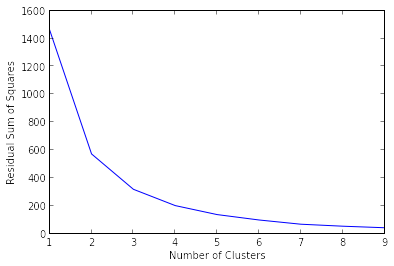

In [32]:
clusts = range(1, 10)

def kmean_rss_score(nclust):
    km = Pipeline([('scale', StandardScaler()), ('cluster', KMeans(nclust))])
    km.fit(X)
    rss = -km.score(X)
    return rss

rss = [kmean_rss_score(i) for i in clusts]
plt.plot(clusts, rss)
plt.xlabel('Number of Clusters')
plt.ylabel('Residual Sum of Squares')
plt.show()